In [24]:
import numpy as np
import scipy as sp
from scipy.signal import correlate
from matplotlib import pyplot as plt
import mne
import os, sys
import pickle
from IPython.display import clear_output
import torch
from neuro_transformers import  train_ecoghubert, ecoghubert_predict, ECoGHuBERT
# getting sylber utils without running module initialization (crashes recent python verison)
from utils import CONFIG
import importlib.util
from pathlib import Path

segutils_path = Path(CONFIG['model']['sylber_dir']) / "sylber" / "utils" / "segment_utils.py"
spec = importlib.util.spec_from_file_location("segment_utils", segutils_path)
segment_utils = importlib.util.module_from_spec(spec)
sys.modules["segment_utils"] = segment_utils
spec.loader.exec_module(segment_utils)
get_segment = segment_utils.get_segment

In [8]:
preds = np.load('./checkpoints/model_predictions_subject_1.npy', allow_pickle=True)
sylber_data = np.load('./pickled_podcast/outputs.pkl', allow_pickle=True)
HIDDEN_STATES = sylber_data['hidden_states']
sylber_segments = sylber_data['segments']; del sylber_data

In [10]:
model, (test_X, test_y) = train_ecoghubert(sub_num=1,
                                           train_ratio=0.8,
                                           val_ratio=0.1,
                                           batch_size=128,
                                           save_folder='doodoo',
                                           hidden_states=HIDDEN_STATES,
                                           chunk_len=100, # 2 seconds at 50Hz
                                           max_plateau=False,
                                           loss_type='mse->cosine',
                                           loss_switch_epoch=20,
                                           n_epochs=50)

Opening raw data file ds005574-1.0.2/derivatives/ecogprep/sub-01/ieeg/sub-01_task-podcast_desc-highgamma_ieeg.fif...
    Range : 0 ... 921599 =      0.000 ...  1799.998 secs
Ready.
Loaded Sylber HuBERT weights
Epoch 1/50


Train Loss: 0.9740 | Val Loss: 0.9484
Epoch 2/50


Train Loss: 0.9517 | Val Loss: 0.9450
Epoch 3/50


Train Loss: 0.9504 | Val Loss: 0.9445
Epoch 4/50


Train Loss: 0.9497 | Val Loss: 0.9445
Epoch 5/50


Train Loss: 0.9496 | Val Loss: 0.9446
Epoch 6/50


Train Loss: 0.9494 | Val Loss: 0.9444
Epoch 7/50


Train Loss: 0.9494 | Val Loss: 0.9447
Epoch 8/50


Train Loss: 0.9491 | Val Loss: 0.9442
Epoch 9/50


Train Loss: 0.9487 | Val Loss: 0.9442
Epoch 10/50


Train Loss: 0.9488 | Val Loss: 0.9461
Epoch 11/50


Train Loss: 0.9483 | Val Loss: 0.9503
Epoch 12/50


Train Loss: 0.9475 | Val Loss: 0.9505
Epoch 13/50


Train Loss: 0.9481 | Val Loss: 0.9484
Epoch 14/50


Train Loss: 0.9467 | Val Loss: 0.9445
Epoch 15/50


Train Loss: 0.9462 | Val Loss: 0.9456
Epoch 16/50


Train Loss: 0.9465 | Val Loss: 0.9532
Epoch 17/50


Train Loss: 0.9457 | Val Loss: 0.9496
Epoch 18/50


Train Loss: 0.9457 | Val Loss: 0.9477
Epoch 19/50


Train Loss: 0.9459 | Val Loss: 0.9479
Epoch 20/50


Train Loss: 0.9462 | Val Loss: 0.9474
Epoch 21/50


Train Loss: -0.5180 | Val Loss: -0.5413
Epoch 22/50


Train Loss: -0.5502 | Val Loss: -0.5550
Epoch 23/50


Train Loss: -0.5528 | Val Loss: -0.5541
Epoch 24/50


Train Loss: -0.5527 | Val Loss: -0.5478
Epoch 25/50


Train Loss: -0.5530 | Val Loss: -0.5523
Epoch 26/50


Train Loss: -0.5565 | Val Loss: -0.5543
Epoch 27/50


Train Loss: -0.5564 | Val Loss: -0.5508
Epoch 28/50


Train Loss: -0.5546 | Val Loss: -0.5524
Epoch 29/50


Train Loss: -0.5538 | Val Loss: -0.5537
Epoch 30/50


Train Loss: -0.5560 | Val Loss: -0.5511
Epoch 31/50


Train Loss: -0.5561 | Val Loss: -0.5524
Epoch 32/50


Train Loss: -0.5566 | Val Loss: -0.5520
Epoch 33/50


Train Loss: -0.5584 | Val Loss: -0.5517
Epoch 34/50


Train Loss: -0.5576 | Val Loss: -0.5528
Epoch 35/50


Train Loss: -0.5559 | Val Loss: -0.5515
Epoch 36/50


Train Loss: -0.5580 | Val Loss: -0.5511
Epoch 37/50


Train Loss: -0.5570 | Val Loss: -0.5511
Epoch 38/50


Train Loss: -0.5577 | Val Loss: -0.5526
Epoch 39/50


Train Loss: -0.5579 | Val Loss: -0.5523
Epoch 40/50


Train Loss: -0.5558 | Val Loss: -0.5518
Epoch 41/50


Train Loss: -0.5575 | Val Loss: -0.5520
Epoch 42/50


Train Loss: -0.5560 | Val Loss: -0.5520
Epoch 43/50


Train Loss: -0.5579 | Val Loss: -0.5519
Epoch 44/50


Train Loss: -0.5587 | Val Loss: -0.5526
Epoch 45/50


Train Loss: -0.5568 | Val Loss: -0.5525
Epoch 46/50


Train Loss: -0.5586 | Val Loss: -0.5518
Epoch 47/50


Train Loss: -0.5561 | Val Loss: -0.5515
Epoch 48/50


Train Loss: -0.5591 | Val Loss: -0.5519
Epoch 49/50


Train Loss: -0.5575 | Val Loss: -0.5518
Epoch 50/50


Train Loss: -0.5581 | Val Loss: -0.5523


In [11]:
from neuro_transformers import  ecoghubert_predict
predictions_np = ecoghubert_predict(model, test_X, test_y).numpy()

Predicting:   0%|          | 0/12 [00:00<?, ?it/s]

Predicting: 100%|██████████| 12/12 [00:00<00:00, 63.34it/s]


In [12]:
preds= predictions_np.reshape(-1, predictions_np.shape[-1])
preds.shape, test_y.shape

((9000, 768), torch.Size([9001, 768]))

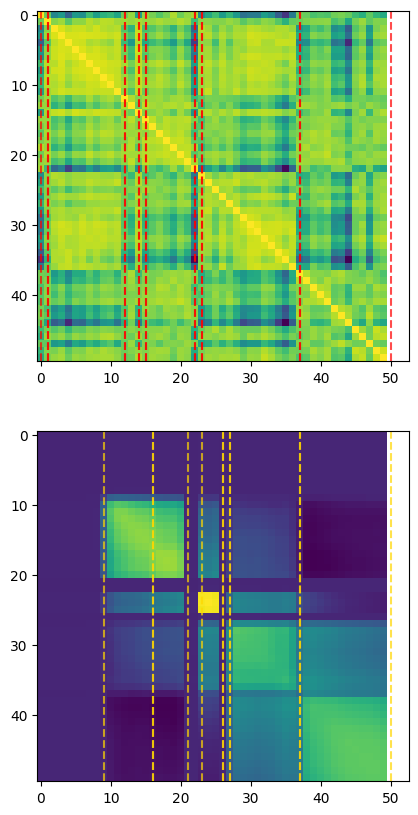

In [71]:
f, (a0, a1) = plt.subplots(2, 1,figsize=(5,10))
test_start_time = 1620.0
s, e = 1796.6, 1797.6

def time_to_rel_idx(t, start=test_start_time, sr=50):
    return int((t - start) * sr)

frame_start, frame_end = time_to_rel_idx(s), time_to_rel_idx(e)

preds_frame = preds[frame_start: frame_end]
y_frame = test_y[frame_start: frame_end]


a0.imshow(preds_frame@preds_frame.T)
a1.imshow(y_frame@y_frame.T)

# segments
preds_norms = np.linalg.norm(preds_frame, axis=-1)
target_norms = np.linalg.norm(y_frame, axis=-1)

# plot segments
norm_threshold, merge_threshold = 0.1, 0.9
segments_y = get_segment(y_frame, norm_threshold, merge_threshold, norms=target_norms)
for si, ei in segments_y:
    a1.axvline(si, color='gold',ls='--',alpha=0.7,label='onset')
    a1.axvline(ei, color='gold', ls='--',alpha=0.7,label='offset')

norm_threshold, merge_threshold = 0.1, 0.9995
segments_pred = get_segment(preds_frame, norm_threshold, merge_threshold, norms=preds_norms)
for si, ei in segments_pred:
    a0.axvline(si, color='red',ls='--',alpha=0.7,label='onset')
    a0.axvline(ei, color='red', ls='--',alpha=0.7,label='offset')